
<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#008B8B; font-size:37px'> UE - Analytics Case Study </h1>
</div>


In [1]:

import pandas as pd
import numpy as np
import os


In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('averaged_perceptron_tagger') # POS
nltk.download('punkt')
nltk.download('wordnet') 

from nltk.corpus import wordnet as wn


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nitin Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to C:\Users\Nitin
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Nitin
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
import seaborn as sns


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing 


In [3]:
## Import the files:
folder_name = "technicalinterviewwithunitededucators"
file_name = "Data_File_Note_Summary.csv"


In [4]:
#notes = pd.read_csv(r"C:\Users\Nitin Kumar\Desktop\Notebooks 23\technicalinterviewwithunitededucators\Data_File_Note_Summary.csv") #, index_col=0)
#notes = pd.read_csv("technicalinterviewwithunitededucators/Data_File_Note_Summary.csv", on_bad_lines='skip')



## Basic Assumptions: 

- ‘CLAIMPAID’ column is the total dollars paid till date, so cumulative amount.  
- ‘CLAIM’ claim number is a unique identifier. 
- No Hierarchy among ‘CAUSEOFLOSS’ 



 # 1.  EDA - Review and explore both Tables. 



- I started by playing around with the files and found that parsing the excel gives me better data quality than csv which was causing some omissions (notes file).  
- The excel is neatly formatted (so I get to skip the pipelining steps).  


- unique CAUSEOFLOSS1 - 21
- unique CAUSEOFLOSS2 -  8
- unique CAUSEOFLOSS3 -  3

- unique LINEOFBUSINESS -  5 


In [5]:
# Read all sheets in the Excel file

df = pd.read_excel("technicalinterviewwithunitededucators/Data_File.xlsx", sheet_name=None)

# df will be a dictionary, where the keys are the sheet names and the values are the corresponding dataframes
print(df.keys())



dict_keys(['Finanical Summary', 'Note Summary'])


In [6]:
df["Note Summary"]



,CLAIM,ID,LINEOFBUSINESS,NOTE
0,64984,311795,ELL,Insured has received notice of potential litig...
1,68005,297331,ELL,Tenure track faculty alleges disability discri...
2,69009,1379419,CGL,Mother of minor female student alleges an empl...
3,69039,262979,FDL,Claimants allege fiduciary violations related ...
4,69494,331231,CGL,A student committed suicide
5,70676,85795,ELL,Equal Employment Opportunity Commission invest...
6,70762,416659,CGL,Student alleges that she was assaulted by an...
7,71175,271567,ELL,"Former employee alleges age, race, and disabil..."
8,71418,297331,ELL,Student athlete claim they were treated ineq...
9,72041,65907,GLX,The insured investigated a medical practioner ...


In [33]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [34]:
df["Note Summary"].describe()


,CLAIM,ID
count,16.0000,16.0000
mean,71184.6250,707266.7500
std,2644.1755,692778.4103
min,64984.0000,65907.0000
25%,69380.2500,269420.0000
50%,71296.5000,321513.0000
75%,73543.2500,1231841.0000
max,74864.0000,2193019.0000


In [36]:
df["Note Summary"].ne


<bound method flex_comp_method_FRAME.<locals>.f of     CLAIM       ID LINEOFBUSINESS  \
0   64984   311795            ELL   
1   68005   297331            ELL   
2   69009  1379419            CGL   
3   69039   262979            FDL   
4   69494   331231            CGL   
5   70676    85795            ELL   
6   70762   416659            CGL   
7   71175   271567            ELL   
8   71418   297331            ELL   
9   72041    65907            GLX   
10  72186   698707            CGL   
11  73505  1220315            CGL   
12  73658  1266419            EFX   
13  73741  2193019            CGL   
14  74397  2041147            ELL   
15  74864   176647            GLX   

                                                 NOTE  
0   Insured has received notice of potential litig...  
1   Tenure track faculty alleges disability discri...  
2   Mother of minor female student alleges an empl...  
3   Claimants allege fiduciary violations related ...  
4                         A student com

In [7]:
df["Note Summary"].columns


Index(['CLAIM', 'ID', 'LINEOFBUSINESS', 'NOTE'], dtype='object')

In [8]:
df["Finanical Summary"]


,CLAIM,LINEOFBUSINESS,ID,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3
0,64984,ELL,311795,0.00,2016-01-01,Wrongful Termination,NaN,NaN
1,64984,ELL,311795,0.00,2016-02-01,Wrongful Termination,NaN,NaN
2,64984,ELL,311795,0.00,2016-03-01,Wrongful Termination,NaN,NaN
3,64984,ELL,311795,0.00,2016-04-01,Wrongful Termination,NaN,NaN
4,64984,ELL,311795,0.00,2016-05-01,Wrongful Termination,NaN,NaN
...,...,...,...,...,...,...,...,...
1053,74864,GLX,176647,1169754.42,2023-03-01,Vehicle,NaN,NaN
1054,74864,GLX,176647,1169754.42,2023-04-01,Vehicle,NaN,NaN
1055,74864,GLX,176647,1169754.42,2023-05-01,Vehicle,NaN,NaN
1056,74864,GLX,176647,1169898.42,2023-06-01,Vehicle,NaN,NaN


In [9]:
financial_df = df["Finanical Summary"]


In [39]:
# Show summary stats: 
#--------------------
display(financial_df.describe())
financial_df.info


,CLAIM,ID,CLAIMPAID
count,1058.0000,1058.0000,1058.0000
mean,70606.0841,636554.8639,78199.0779
std,2597.4357,616075.7185,234671.8076
min,64984.0000,65907.0000,0.0000
25%,69039.0000,271567.0000,0.0000
50%,70762.0000,311795.0000,0.0000
75%,72186.0000,1220315.0000,6110.9775
max,74864.0000,2193019.0000,1169898.4200


<bound method DataFrame.info of       CLAIM LINEOFBUSINESS      ID    CLAIMPAID SNAPSHOTDATE  \
0     64984            ELL  311795       0.0000   2016-01-01   
1     64984            ELL  311795       0.0000   2016-02-01   
2     64984            ELL  311795       0.0000   2016-03-01   
3     64984            ELL  311795       0.0000   2016-04-01   
4     64984            ELL  311795       0.0000   2016-05-01   
...     ...            ...     ...          ...          ...   
1053  74864            GLX  176647 1169754.4200   2023-03-01   
1054  74864            GLX  176647 1169754.4200   2023-04-01   
1055  74864            GLX  176647 1169754.4200   2023-05-01   
1056  74864            GLX  176647 1169898.4200   2023-06-01   
1057  74864            GLX  176647 1169898.4200   2023-07-01   

              CAUSEOFLOSS1 CAUSEOFLOSS2 CAUSEOFLOSS3  
0     Wrongful Termination          NaN          NaN  
1     Wrongful Termination          NaN          NaN  
2     Wrongful Termination        

In [68]:
financial_df.dtypes

CLAIM                      int64
LINEOFBUSINESS            object
ID                         int64
CLAIMPAID                float64
SNAPSHOTDATE      datetime64[ns]
CAUSEOFLOSS1              object
CAUSEOFLOSS2              object
CAUSEOFLOSS3              object
dtype: object

In [88]:
a = financial_df['CAUSEOFLOSS1'].unique() # 21
print(a, len(a))
b = financial_df['CAUSEOFLOSS2'].unique() # 8
print(b, len(b))
c = financial_df['CAUSEOFLOSS3'].unique() # 3
print(c, len(c))

business_unique = financial_df['LINEOFBUSINESS'].unique() # 5 
print(business_unique, len(business_unique))


['Wrongful Termination' 'Whistleblower violations'
 'Discrimination-Disability' 'Discrimination-Race' nan
 'Assault - sexual - perp 18 or older' 'Employee Benefit Liability'
 'Self-inflicted/Suicide/Intentional harm'
 'Self inflicted/Suicide/Intentional harm' 'TBD' 'Discrimination-Age'
 'Title IX' 'No Coverage' 'Civil rights deprivation' 'Reputation/Privacy'
 'Assault Civil' 'Discrimination-Retaliation' 'Athletic activity - other'
 'Breach of Contract' 'Accident - causes injury to people' 'Vehicle'] 21
[nan 'Discrimination-Retaliation' 'Discrimination-Race'
 'Breach of Fiduciary Duty' 'Breach of Contract' 'Negligence'
 'Discrimination-Gender' 'Defamation' 'Discrimination-Age'] 9
[nan 'Discrimination-Retaliation' 'Discrimination-Disability'
 'Whistleblower violations'] 4
['ELL' 'CGL' 'FDL' 'GLX' 'EFX'] 5



 ## 1 (A).   Plot a distribution for 'LINEOFBUSINESS' column  


- ELL and CGL each had 6 claimns while all the rest were 2 or less. 
- I don't need unstack here, esp. for singlualr columns. It gives out a better default graphic without going for matplotlib.  
- Similarly, Can plot a distribution for 'CAUSEOFLOSS1' column as well.   


In [10]:
df["Note Summary"].groupby('LINEOFBUSINESS').LINEOFBUSINESS.value_counts() #.unstack(0)


LINEOFBUSINESS  LINEOFBUSINESS
CGL             CGL               6
EFX             EFX               1
ELL             ELL               6
FDL             FDL               1
GLX             GLX               2
Name: LINEOFBUSINESS, dtype: int64

<AxesSubplot: ylabel='LINEOFBUSINESS'>

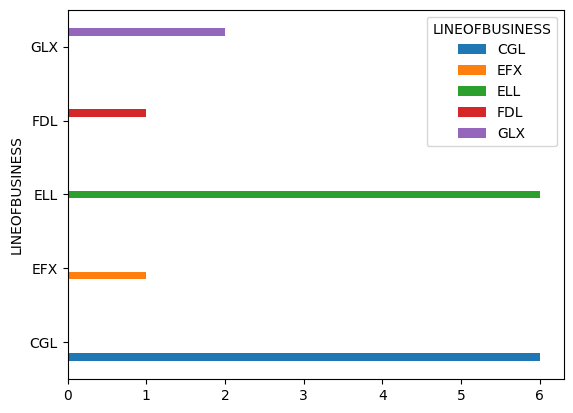

In [11]:
df["Note Summary"].groupby('LINEOFBUSINESS').LINEOFBUSINESS.value_counts().unstack(0).plot.barh()
                                                                             

<AxesSubplot: ylabel='LINEOFBUSINESS'>

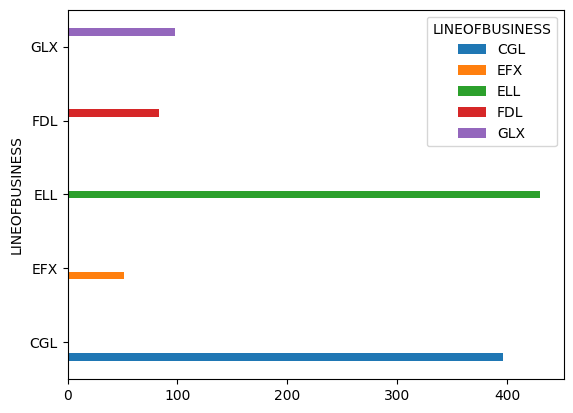

In [12]:
df["Finanical Summary"].groupby('LINEOFBUSINESS').LINEOFBUSINESS.value_counts().unstack(0).plot.barh()



 ## 1 (B).  Plot a distribution for 'Customer ID' column. 



- I wanted to get a better picture on difference between "Customer ID" and "line of business". 
- The count on x-axis gives the number of months a claim lasted. 


In [13]:
df["Finanical Summary"].groupby('ID').ID.value_counts()
df["Note Summary"].groupby('ID').ID.value_counts()


ID       ID     
65907    65907      1
85795    85795      1
176647   176647     1
262979   262979     1
271567   271567     1
297331   297331     2
311795   311795     1
331231   331231     1
416659   416659     1
698707   698707     1
1220315  1220315    1
1266419  1266419    1
1379419  1379419    1
2041147  2041147    1
2193019  2193019    1
Name: ID, dtype: int64

<AxesSubplot: ylabel='ID,ID'>

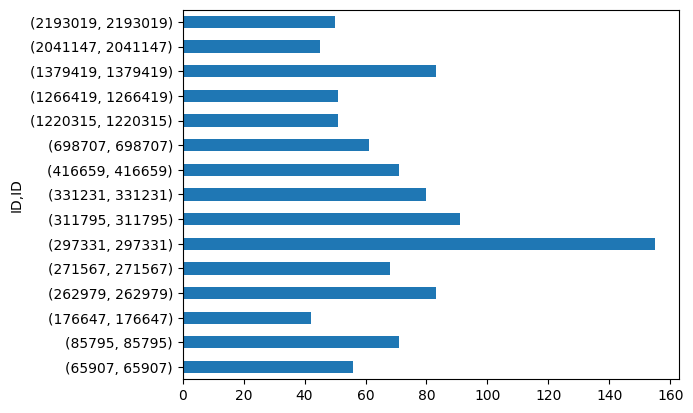

In [14]:
df["Finanical Summary"].groupby('ID').ID.value_counts().plot.barh()


<AxesSubplot: ylabel='ID,ID'>

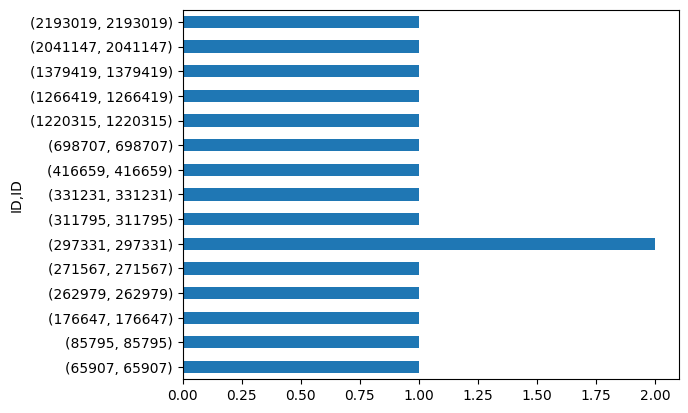

In [15]:
df["Note Summary"].groupby('ID').ID.value_counts().plot.barh()



 ## 1 (C).   How long did each claim last -  months (calculated in days). 



In [16]:
df_grp = financial_df.groupby(['CLAIM']) 
  
# using agg() function on Date column 
df_gap = df_grp.agg(Start_Date=('SNAPSHOTDATE', np.min), End_Date=('SNAPSHOTDATE', np.max)) 
  
# display(df_gap)

df_gap[['Start_Date','End_Date']] = df_gap[['Start_Date','End_Date']].apply(pd.to_datetime) #if conversion required
df_gap['Days_Lasted'] = (df_gap['End_Date'] - df_gap['Start_Date']).dt.days

## Displaying result 
display(df_gap)


,Start_Date,End_Date,Days_Lasted
CLAIM,,,
64984,2016-01-01,2023-07-01,2738
68005,2016-03-01,2023-07-01,2678
69009,2016-09-01,2023-07-01,2494
69039,2016-09-01,2023-07-01,2494
69494,2016-12-01,2023-07-01,2403
70676,2017-09-01,2023-07-01,2129
70762,2017-09-01,2023-07-01,2129
71175,2017-12-01,2023-07-01,2038
71418,2018-02-01,2023-07-01,1976



 ## 1 (D). Total amount for each claim. 


- Gives the claims that had to have zero payouts. 3 such claims. Can give the highest (1169898.42) and and lowest claims.  
- Can give total amount paid out in any given group or time period like a client group or a year.  
- Since the snapshots are on 1st so number of days don't give the exact picture. 


In [17]:
display(financial_df.groupby(['CLAIM'])['CLAIMPAID'].max())

#financial_df['max_amount'] = financial_df.groupby('CLAIM')['CLAIMPAID'].transform('max')


CLAIM
64984      37652.95
68005          0.00
69009     100068.40
69039      24038.42
69494      41341.46
70676    1015984.59
70762          0.00
71175      60500.00
71418        243.18
72041     682231.77
72186       1019.40
73505      85617.89
73658       1190.00
73741        137.90
74397          0.00
74864    1169898.42
Name: CLAIMPAID, dtype: float64

In [18]:
financial_df

,CLAIM,LINEOFBUSINESS,ID,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3
0,64984,ELL,311795,0.00,2016-01-01,Wrongful Termination,NaN,NaN
1,64984,ELL,311795,0.00,2016-02-01,Wrongful Termination,NaN,NaN
2,64984,ELL,311795,0.00,2016-03-01,Wrongful Termination,NaN,NaN
3,64984,ELL,311795,0.00,2016-04-01,Wrongful Termination,NaN,NaN
4,64984,ELL,311795,0.00,2016-05-01,Wrongful Termination,NaN,NaN
...,...,...,...,...,...,...,...,...
1053,74864,GLX,176647,1169754.42,2023-03-01,Vehicle,NaN,NaN
1054,74864,GLX,176647,1169754.42,2023-04-01,Vehicle,NaN,NaN
1055,74864,GLX,176647,1169754.42,2023-05-01,Vehicle,NaN,NaN
1056,74864,GLX,176647,1169898.42,2023-06-01,Vehicle,NaN,NaN



 ## 1 (E)  Advanced analytics sample - Summary wordcloud on Notes for a macro picture. 



- clean the text - an opportunity to elude to the text cleaning components that UE will need, I think
- Pipeline tasks like stopword removal, Stemming, Lemmatization, tokenization, etc.   


In [19]:
notes_all_text = df["Note Summary"].NOTE.to_string(index=False)


In [20]:
notes_all_text = notes_all_text.replace('\n', ' ')
# notes_all_text

### Text processing and plot the Word Cloud


In [21]:
def one_doc_wordcloud(text):
    
    # Text prepcessing: 
    # remove brackets with abbrivations intact. 
    textr3 = text.replace('(', '').replace(")", "")
    
    # normalise forms of POS
    textr4 = textr3
    # SPECIAL CHARS: ??
    # Stemming:  ??
    
    # Adjectives
    text_token=nltk.word_tokenize(textr4) #text)
    abc = nltk.pos_tag(text_token)
    new_text3 = [s for s in abc if s[1] != 'JJ']
    no_adj_string = ''
    no_adj_list = [word for (word,tag) in new_text3]# if tag == "JJ"]
    no_adj_string = ' '.join(no_adj_list)
    #print(no_adj_string)
    
    # Custom stop words list appended: 
    custom_stop_words = ["https"] + list(STOPWORDS)
    custom_stop_words = set(custom_stop_words) 
    
    # create cloud:
    wordcloud = WordCloud(max_font_size=70, 
                      max_words=100, 
                      stopwords=custom_stop_words, 
                      background_color="white",
                      normalize_plurals= True).generate(no_adj_string) #textr3) #no_adj_string)
    
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    plt.savefig('saved_figure.png')
    # plt.show()
    
    
    return 0  #wc_image


0

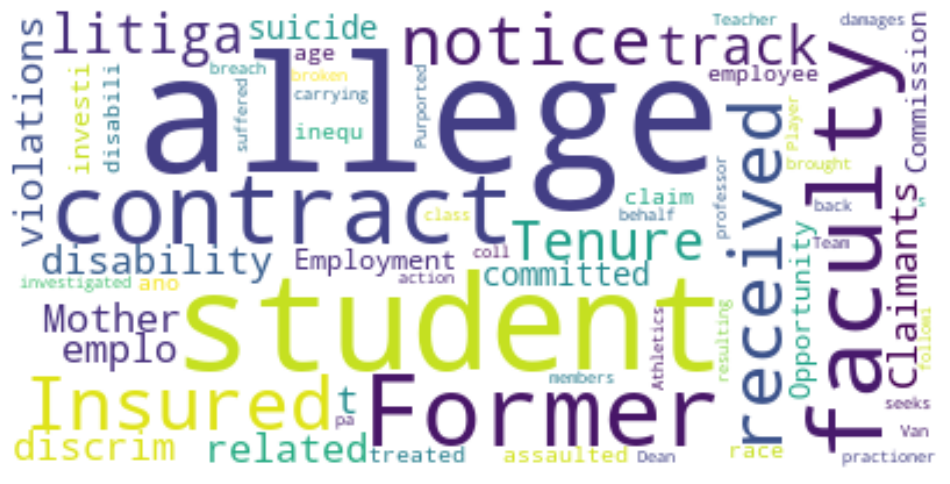

In [22]:
one_doc_wordcloud(notes_all_text)



# 2.  Combine the 2 separate sheets to consolidate the data. 


- Can use SQL or Pandas to combine the data depending on the source structure. 
- I can also, group and combine, or combine and group. Several ways to combine. 
- I join on the 'CLAIM' columm, asuming its a unique identifier.     
- 'Notes' column is the only unique thing to bring in from the "Note Summary" table, I think. 
- 'LINEOFBUSINESS' and 'ID' already exist.  



In [23]:
combined_data = pd.merge(financial_df, df["Note Summary"], on='CLAIM', how='left')
combined_data


,CLAIM,LINEOFBUSINESS_x,ID_x,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3,ID_y,LINEOFBUSINESS_y,NOTE
0,64984,ELL,311795,0.00,2016-01-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...
1,64984,ELL,311795,0.00,2016-02-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...
2,64984,ELL,311795,0.00,2016-03-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...
3,64984,ELL,311795,0.00,2016-04-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...
4,64984,ELL,311795,0.00,2016-05-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...
...,...,...,...,...,...,...,...,...,...,...,...
1053,74864,GLX,176647,1169754.42,2023-03-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...
1054,74864,GLX,176647,1169754.42,2023-04-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...
1055,74864,GLX,176647,1169754.42,2023-05-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...
1056,74864,GLX,176647,1169898.42,2023-06-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...


In [55]:
#combined_grouped_df = financial_df.groupby(['CLAIM'])[''].max().to_frame(combined_grouped_df)
#display(financial_df.groupby(['CLAIM'])['CLAIMPAID'].max())


In [ ]:
combined_grouped_df

In [26]:
display(combined_data.groupby(['CLAIM'])['CLAIMPAID'].max())

combined_data['max_amount'] = combined_data.groupby('CLAIM')['CLAIMPAID'].transform('max')



CLAIM
64984      37652.95
68005          0.00
69009     100068.40
69039      24038.42
69494      41341.46
70676    1015984.59
70762          0.00
71175      60500.00
71418        243.18
72041     682231.77
72186       1019.40
73505      85617.89
73658       1190.00
73741        137.90
74397          0.00
74864    1169898.42
Name: CLAIMPAID, dtype: float64

In [27]:
combined_data

,CLAIM,LINEOFBUSINESS_x,ID_x,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3,ID_y,LINEOFBUSINESS_y,NOTE,max_amount
0,64984,ELL,311795,0.00,2016-01-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.95
1,64984,ELL,311795,0.00,2016-02-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.95
2,64984,ELL,311795,0.00,2016-03-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.95
3,64984,ELL,311795,0.00,2016-04-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.95
4,64984,ELL,311795,0.00,2016-05-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.95
...,...,...,...,...,...,...,...,...,...,...,...,...
1053,74864,GLX,176647,1169754.42,2023-03-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...,1169898.42
1054,74864,GLX,176647,1169754.42,2023-04-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...,1169898.42
1055,74864,GLX,176647,1169754.42,2023-05-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...,1169898.42
1056,74864,GLX,176647,1169898.42,2023-06-01,Vehicle,NaN,NaN,176647,GLX,Van carrying members of the Athletics Team col...,1169898.42



 ## 2 (A). Visual Trend analysis - Correlation of when the payment starts to the magnitude of payment.
 

* To see if it influences the minimum amount of funds the company should keep at hand, thus maximizing the invested amount. 


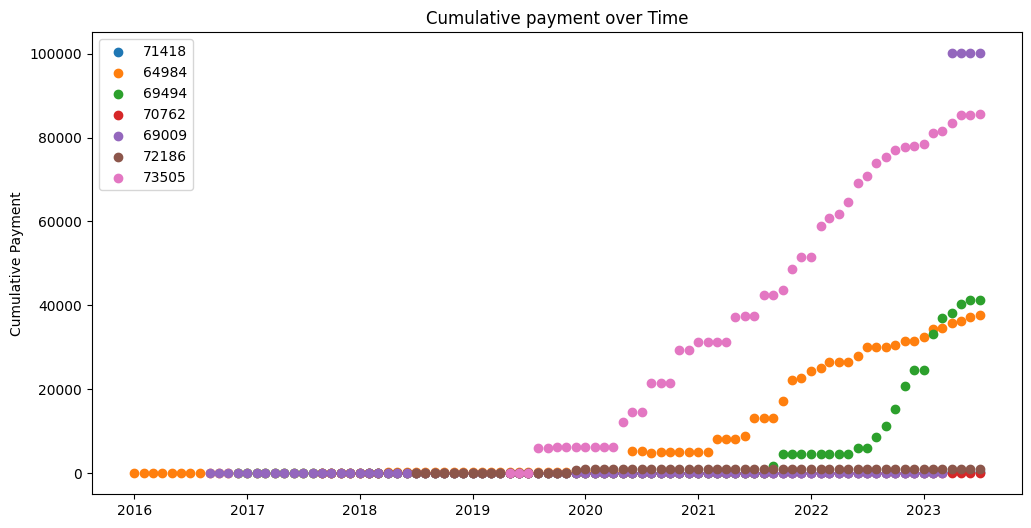

In [58]:
plt.figure(figsize=(12, 6))
plt.ticklabel_format() # useOffset=False 
plt.ylabel("Cumulative Payment")


id_list = []
for c_id in combined_data["CLAIM"].sample(7, random_state=2):
    id_list.append(c_id)
    plt.title(f"Cumulative payment over Time")
    claims = combined_data[combined_data["CLAIM"] == c_id]
    plt.scatter("SNAPSHOTDATE", "CLAIMPAID", data=claims, label=c_id)
plt.legend()



 # 3.  ML - Advanced Analytics on Combined Data



- CLAIM, LINEOFBUSINESS, ID, CAUSEOFLOSS1, CAUSEOFLOSS2, and CAUSEOFLOSS3  are independent variables.  
- LINEOFBUSINESS, CAUSEOFLOSS1, CAUSEOFLOSS2, and CAUSEOFLOSS3 are Categorical.
- CLAIMPAID would be one dependent variable. We can try to find the influence of the above variables on it.   
- Categorical variables need to be encoded for running ML analysis.    
- CAUSEOFLOSS2, and CAUSEOFLOSS3 have lots of missing values. 

- I checked to see if LINEOFBUSINESS valus falls in any groups based on their CAUSEOFLOSS1 categories using clustering. No obvious patterns emerged.     
- Clustering would help classfying polies into groups (that can be risk based), and that can help policy recommendation for future. 
* The ratio of data points to featurues being small influences the outcome and prevents from getting substancial insights.  



In [69]:
financial_df.dtypes

CLAIM                      int64
LINEOFBUSINESS            object
ID                         int64
CLAIMPAID                float64
SNAPSHOTDATE      datetime64[ns]
CAUSEOFLOSS1              object
CAUSEOFLOSS2              object
CAUSEOFLOSS3              object
dtype: object

In [77]:
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
combined_data['CAUSEOFLOSS1_e'] = label_encoder.fit_transform(combined_data['CAUSEOFLOSS1'])
combined_data.head()


,CLAIM,LINEOFBUSINESS_x,ID_x,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3,ID_y,LINEOFBUSINESS_y,NOTE,max_amount,CAUSEOFLOSS1_e
0,64984,ELL,311795,0.0000,2016-01-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19
1,64984,ELL,311795,0.0000,2016-02-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19
2,64984,ELL,311795,0.0000,2016-03-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19
3,64984,ELL,311795,0.0000,2016-04-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19
4,64984,ELL,311795,0.0000,2016-05-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19


In [79]:
#make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()
combined_data['LINEOFBUSINESS_e'] = label_encoder.fit_transform(combined_data['LINEOFBUSINESS_x'])
combined_data.head()


,CLAIM,LINEOFBUSINESS_x,ID_x,CLAIMPAID,SNAPSHOTDATE,CAUSEOFLOSS1,CAUSEOFLOSS2,CAUSEOFLOSS3,ID_y,LINEOFBUSINESS_y,NOTE,max_amount,CAUSEOFLOSS1_e,LINEOFBUSINESS_e
0,64984,ELL,311795,0.0000,2016-01-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19,2
1,64984,ELL,311795,0.0000,2016-02-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19,2
2,64984,ELL,311795,0.0000,2016-03-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19,2
3,64984,ELL,311795,0.0000,2016-04-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19,2
4,64984,ELL,311795,0.0000,2016-05-01,Wrongful Termination,NaN,NaN,311795,ELL,Insured has received notice of potential litig...,37652.9500,19,2


C:\Users\Nitin Kumar\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='LINEOFBUSINESS_e', ylabel='CAUSEOFLOSS1_e'>

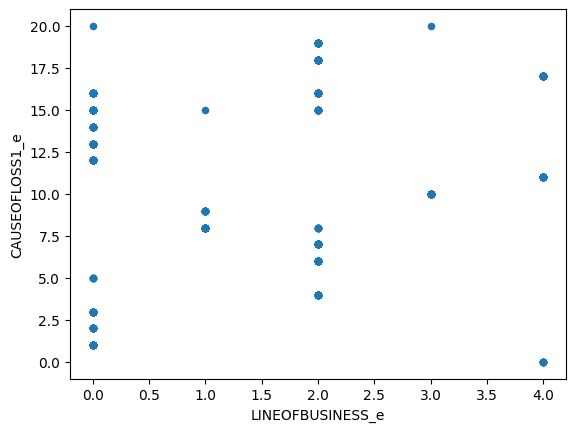

In [80]:
points = pd.DataFrame(combined_data, columns=["LINEOFBUSINESS_e", "CAUSEOFLOSS1_e"])
points.plot.scatter("LINEOFBUSINESS_e", "CAUSEOFLOSS1_e")


In [90]:
kmeans = KMeans(n_clusters=3, n_init="auto").fit(points)


C:\Users\Nitin_Kumar\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [91]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=["LINEOFBUSINESS_e", "CAUSEOFLOSS1_e"])
cluster_centers


,LINEOFBUSINESS_e,CAUSEOFLOSS1_e
0,1.2941,4.7211
1,1.5241,16.6881
2,1.6806,11.4271


C:\Users\Nitin Kumar\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='LINEOFBUSINESS_e', ylabel='CAUSEOFLOSS1_e'>

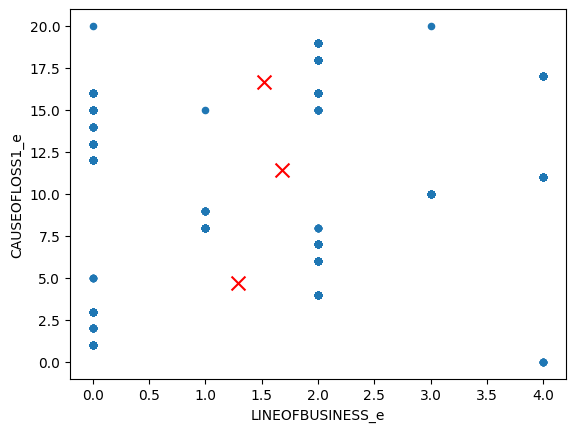

In [92]:
ax = points.plot.scatter("LINEOFBUSINESS_e", "CAUSEOFLOSS1_e")
cluster_centers.plot.scatter("LINEOFBUSINESS_e", "CAUSEOFLOSS1_e", ax=ax, c="red", s=100, marker="x")


<AxesSubplot: xlabel='LINEOFBUSINESS_e', ylabel='CAUSEOFLOSS1_e'>

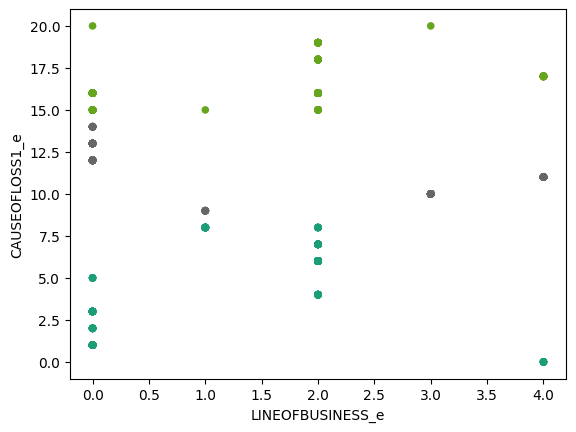

In [93]:
points.plot.scatter("LINEOFBUSINESS_e", "CAUSEOFLOSS1_e", c=kmeans.labels_, colormap="Dark2", colorbar=False)


In [ ]:
# analyze and plot coorelation between the independent variables. heat map maybe. 


In [95]:
# cormat = financial_df.corr()
# round(cormat,2)

In [94]:
#sns.heatmap(cormat);



 # 4.  Additional Advanced analytics/Machine Learning analyses possible on Combined Data


- Notes text can be indexed to offer semantic search features. 
- Model can be trained to potentially predict cause of loss from the 'Notes', with sufficient data.  
- Analysis of sentiment on the notes column and relate to the amount of payout.  - for combined dataset.  
- Comments or reaction text processing to evaluate user experience 

- Low risk clients based on claims history can earn discounts. 



- "causeof loss 1" has any infuence on claim paid?   
- Number of months since start seems to have a relation with the cumulative amount.
    to ascertain the relation: regression analysis.
- Regression/time series -  regression won't really be the best fit given the nature of data. 
- Disect data into sub-series and use the time series approach to do (maybe) a CNN on cost with duration prediction.  




 # 5.  Lessons Learned from the Data 



- The excel file is much cleaner than what I expect from the text files previously discussed. 

- The LINEOFBININESS - ELL and CGL each had 6 claims, while all the rest were 2 or less. 
- using ID column, only one customer have more than one claims looks like, from the notes table.
- 

- Bar plots on the LINEOFBUSINESS and ID columns give a view of how manys months a claim lasted. 
- The 'Total amount of each claim calculation' gives the claims that had to have zero payouts. 3 such claims. Can give the highest (1169898.42 for customer 176647) and and lowest claims as well. The percentage between filed and loss claims can influence business policy.   
    - Secondary: It can give total amount paid out in any given group or time period like a client group or a year.  
    - Since the snapshots are on 1st so number of days don't give the exact picture. 


- I used the Wordcloud subtask as an opportunity to elude to the text cleaning components that UE will need I think, based on last discussion on data sources. Apart from helping to discover comon theams.  and can be used to categorize claims. 
    Also serves as a sample for NLP analytics.      

- SNAPSHOTDATE column gives the opportunity for time series analysis. See and compare how the cumulative paid amount changed over time for each claim.  

- I checked to see if LINEOFBUSINESS valus falls in any groups based on their CAUSEOFLOSS1 categories using clustering. No obvious patterns emerged. 

-  Clustering would help classfying polies into groups (that can be risk based), and that can help policy recommendation for future. 
* But the ratio of data points to featurues being small influences the outcome and prevents from getting substancial insights. 

- I could also do group based analysis for each claim, I would either ignore the 2 and 3 CAUSEOFLOSS, esp 3 since its mostly NA. 







# Thank you  
